In [32]:
import numpy as np
from matplotlib import pyplot as plt
import sympy
%matplotlib inline

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams['font.size'] = 20

In [33]:
sympy.init_printing()

In [34]:
x = sympy.symbols('x')

In [35]:
x

/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


In [36]:
x, nu, t = sympy.symbols('x nu t')

In [37]:
nu

In [38]:
phi = (sympy.exp(-(x-4*t)**2 / (4*nu*(t+1))) + 
       sympy.exp(-(x - 4*t - 2* sympy.pi)**2/(4*nu*(t+1)) ) )

In [39]:
phi

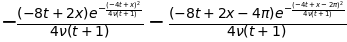

In [40]:
phiprime = phi.diff(x)
phiprime

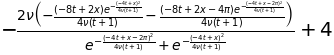

In [41]:
u = -2*nu*phiprime / phi + 4
u

In [42]:
from sympy.utilities.lambdify import lambdify

In [43]:
u_lamb = lambdify((t, nu, x), u)
type(u_lamb)

function

In [44]:
u_lamb(1, 4, 3)

In [45]:
nx = 101
L = 2 * np.pi
dx = L / (nx -1)

nu = 0.07
sigma = 0.1
dt = sigma * dx**2 / nu
nt = 100

In [47]:
x = np.linspace(0.0, L, num=nx)

In [48]:
u0 = np.empty(nx)
for i in range(nx):
    u0[i] = u_lamb(0.0, nu, x[i])

/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


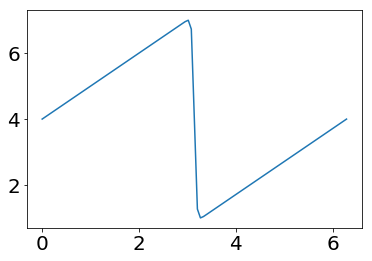

In [49]:
plt.plot(x, u0)

In [50]:
u_hist = [u0.copy()]
u = u0.copy()
for n in range(nt):
    un = u.copy()
    # Update all interiors
    u[1:-1] = (un[1:-1] - 
              un[1:-1]*dt/dx*(un[1:-1] - un[:-2]) +
              nu*dt / dx**2 * (un[:-2] - 2 * un[1:-1] + un[2:]))
    # Boundary conditions
    u[0] = (un[0] - un[0] * dt/dx * (un[0] - un[-2]) +
           nu*dt/dx**2 * (un[-2] - 2*un[0] + un[1]))
    u[-1] = u[0]
    # Record.
    u_hist.append(u.copy()) 